# Предсказание цен автомобилей с использованием линейной регрессии на NumPy

Дисклеймер: Искушенному читателю данный проект местами может показаться сумбурным и перегруженным лишними действиями. Но я решил оставить его в таком "нерафинированном" виде, как бы отражающим рабочий процесс.

## 1. Считывание и подготовка данных

In [1]:
# импорт необходимых библиотек

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# открываем файл, смотрим содержимое

df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# размер датафрейма

df.shape

(11914, 16)

16 колонок и почти 12000 строк

In [4]:
# общая информация

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Можно сразу заметить, что в некоторых колонках отсутствуют значения. К этому факту мы еще вернемся.

In [5]:
# названия колонок

df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

|   |   |
|:---|:---|
| Make | Производитель |
| Model | Модель |
| Year | Год выпуска |
| Engine Fuel Type | Тип топлива |
| Engine HP | Мощность двигателя (л.с.) |
| Engine Cylinders | Число цилиндров двигателя  |
| Transmission Type | Тип трансмиссии (КПП) |
| Driven_Wheels | Ведущие колеса |
| Number of Doors | Количество дверей |
| Market Category | Рыночная категория |
| Vehicle Size | Тип размера автомобиля |
| Vehicle Style | Тип кузова |
| highway MPG | Расход топлива по трассе (миль на галлон) |
| city mpg | Расход топлива по городу (миль на галлон) |
| Popularity | Рейтинг популярности (Twitter) |
| MSRP | Рекомендованная цена продажи |

In [6]:
# приводим названия колонок к единообразию: все буквы строчные, слова соединены символом "_"

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [7]:
# аналогично приводим к единообразию строковые значения в колонках
# сперва выделим колонки с строковыми значениями

string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
# теперь проводим преобразование значений в этих колонках

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
# проверим, что получилось

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [10]:
# информация по числовым параметрам

df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Немного настораживает минимальное количество цилиндров двигателя (engine_cylinders) равное нулю. Скорее всего, это ошибка. Но пока оставим эти значения без изменения. При построении модели ноль будет соответствовать отсутствию информации и параметр engine_cylinders не будет приниматься в расчет.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

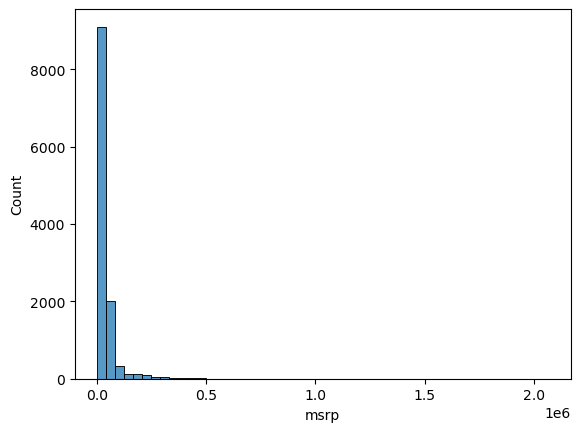

In [14]:
# MSPR (Рекомендованная производителем розничная цена) - целевой параметр. Рассмотрим его внимательнее, построив гистограмму

sns.histplot(df.msrp, bins=50)

Видно очень много автомобилей до 30 тыс.\\$, немного от 30 тыс. до 50 тыс.\\$ и совсем мало от 50 тыс. до 2 млн.\\$.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

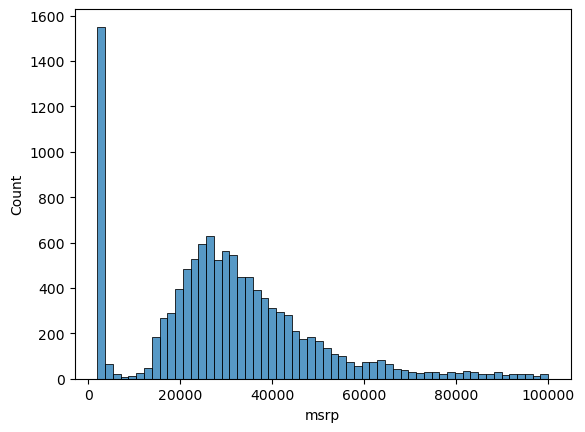

In [15]:
sns.histplot(df.msrp[df.msrp < 100000])

Длинный хвост в распределении цен может оказать негативное влияние на модель. В таких случаях рекомендуется использовать логарифмическое преобразование. 

In [16]:
# log_msrp = log(msrp + 1)

log_msrp = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

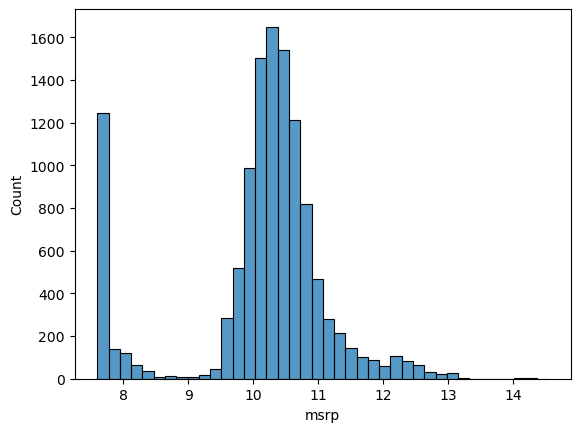

In [17]:
# гистограмма цены после логарифмического преобразования

sns.histplot(log_msrp, bins=40)

Хвост "пропал". Получилось распределение, похожее на нормальное, но бимодальное (обусловленное большим количеством дешевых автомобилей).

In [18]:
# сосчитаем количество пропусков в колонках

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [19]:
# заполним пропущенные данные в колонке market_category пустой строкой ('').
# это пригодится нам позже, когда мы будем искать ключевые слова в строках (0 в таком случае будет мешать)

df['market_category'].fillna('', inplace=True)

In [20]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_fuel_type      3
engine_hp            69
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
market_category       0
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
msrp                  0
dtype: int64

In [21]:
# заполним пропущеные данные нулями. как и в случае с параметром engine_cylinders, ноль будет означать отсутствие информации

df = df.fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

## 2. Разделение исходного датафрейма на несколько наборов данных

Разобьем весть датафрейм на 3 части: для обучения (60 %), проверочный (20 %) и тестовый (20 %).  
(Так как цель проекта не отработка модели, а иллюстрация использования метода линейной регрессии, то не будем заморачиваться с кросс-валидацией)

In [22]:
n = len(df)                 # количество строк в исходном датафрейме

n_val = int(0.2 * n)        # количество строк на проверочный
n_test = int(0.2 * n)       # количество строк на тестовый
n_train = int(0.6 * n)      # количество строк на обучающий

In [23]:
# для обеспечения воспроизводимости результатов зафиксируем начальное значение рандомайзера, создадим массив и перемешаем его

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

In [24]:
# используем полученный массив для создания нового перемешанного датафрейма

df_shuffled = df.iloc[idx]
df_shuffled.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [25]:
# создаем 3 запланированных набора данных из перемешанного датафрейма. чтобы не влиять на исходные данные, создаем копию.

df_train = df_shuffled.iloc[: n_train].copy() 
df_val = df_shuffled.iloc[n_train : n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val :].copy()

In [26]:
# значения целевой переменной (цена автомобиля) для каждого датафрейма

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [27]:
# в каждом наборе данных создадим колонку с логарифмированным значением msrp. 
# колонку msrp удалим, чтобы исключить возможность случайного использования при построении предсказательной модели

for df_ in [df_train, df_val, df_test]:
    df_['log_msrp'] = np.log1p(df_['msrp'])
    del df_['msrp']

In [28]:
num_cols = len(list(df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index))
cat_cols = len(list(df.dtypes[df.dtypes == 'object'].index))

print(f'Итак, у нас имеются {num_cols} числовых колонок и {cat_cols} колонок с категориальными признаками.')

Итак, у нас имеются 8 числовых колонок и 8 колонок с категориальными признаками.


Переведем переменную year в age, а переменную number_of_doors будем считать категориальной. Все категориальные переменные переведем в числовые.

In [29]:
# заменим во всех 3 наборах данных колонку year на колонку age

max_year = df['year'].max()                      # максимальный год. будем считать возраст от него
for dfrm in [df_train, df_val, df_test]:
    dfrm['age'] = max_year - dfrm['year']
    del dfrm['year']

In [30]:
# определим в качестве базового набора характеристик числовые признаки за исключением number_of_doors

base_features = [col for col in df_train.columns if df_train[col].dtypes != 'object' and col != 'number_of_doors' and col != 'log_msrp']
base_features

['engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'popularity',
 'age']

## 3. Немного о линейной регрессии

Предсказываемый параметр $ y $ (логарифм цены автомобиля) находится по формуле:  
$$ y = g(x), $$ 
где $ x $ - вектор  признаков/характеристик,  а $ g(x) $ - функция, имеющая вид 
$$ g(x) = a_0 + a_1 * x_1 + ... + a_n * x_n .$$  
Для удобства вычислений примем, что $ x_0 = 1 ,$ тогда  
$$ a_0 * x_0 = a_0 $$
$$ g(x)=\Sigma^{n}_{j=0}x_j * a_j $$  
Для множества наблюдений вектор $ x $ заменяется матрицей $ X $.  

Вектор коэффициентов/весов $ a $ находится по формуле
$$ a = (X^T * X)^{-1} * X^T * y ,$$  
где \$ X^T \$ - транспонированая матрица $ X $.

In [31]:
# определим функцию линейной регрессии на основе NumPy

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])                  # создание массива из 1
    X = np.column_stack([ones, X])              # добавление массива из 1 в качестве первого столбца (х0=1)
    
    XTX = X.T.dot(X)                            # транспорируем матрицу Х и умножаем на исходную матрицу Х
    XTX_inv = np.linalg.inv(XTX)                # вычисляем (XT * X)^(-1)
    a = XTX_inv.dot(X.T).dot(y)                 # вычисляем оставшуюся часть
    
    return a[0], a[1:]

## 4. Обучение модели на базовом наборе *числовых* характеристик

In [32]:
# создадим датафрейм для обучения с базовым набором характеристик
 
df_train_base = df_train[base_features]
X_train_base = df_train_base.values
X_train_base.shape

(7148, 6)

In [33]:
# используем функцию для нахождения коэффициентов линейной регрессии

a_0, a = train_linear_regression(X_train_base, y_train)

In [34]:
# построим прогноз цены на основе полученных коэффициентов

y_pred_base = a_0 + X_train_base.dot(a)

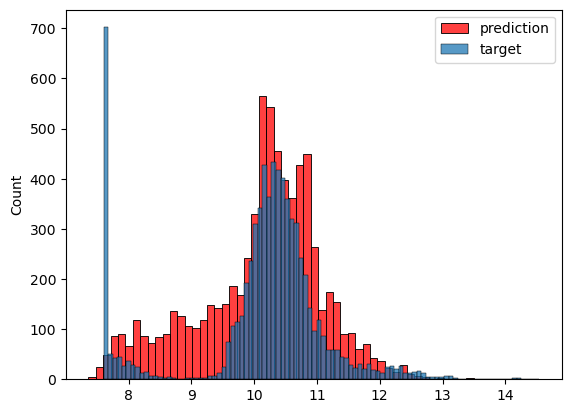

In [35]:
# сравним на диаграмме истинные и предсказанные значения

sns.histplot(y_pred_base, label='prediction', color='r')
sns.histplot(y_train, label='target')
plt.legend()

Распределение предсказанных значений близко к фактическому, но с серьезными отклонениями. Особенно в области дешевых автомобилей.  
Проведем оценку качества модели с помощью метрики RMSE (корень среднеквадратичной ошибки).

In [36]:
# функция для вычисления RMSE

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    rmse = np.sqrt(mse)
    return rmse

In [37]:
# рассчитаем RMSE для модели на основе базовых характеристик

round(rmse(y_train, y_pred_base), 4)

0.5175

Корень среднеквадратичной ошибки довольно маленький. Но осталась еще куча неиспользованных параметров. Попробуем использовать их, чтобы улучшить модель.

## 5. Конструирование новых признаков

Для начала надо перевести все категориальные признаки в числовые.

In [38]:
# определим колонки с категориальными переменными и добавим к ним number_of_doors

cat_features = [col for col in df_train.columns if df_train[col].dtypes == 'object' or col == 'number_of_doors']
cat_features

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'number_of_doors',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [39]:
# проверим количество уникальных строк для каждой категориальной переменной

for feature in cat_features:
    print(f' {feature} - {len(df[feature].unique())}')

 make - 48
 model - 914
 engine_fuel_type - 11
 transmission_type - 5
 driven_wheels - 4
 number_of_doors - 4
 market_category - 72
 vehicle_size - 3
 vehicle_style - 16


Добавить по 3-16 новых признака не проблема. Но вот добавление 48, 72 и, тем более, 914 признаков может перегрузить датафрейм. Желательно как-то сократить количество новых признаков из колонок make, market_category и model.  


Если посмотреть на колонку market_category, то можно увидеть, что 72 уникальных строки складывается из различных сочетаний ограниченного набора слов. Попробуем вытащить эти слова, подсчитать их количество и использовать для добавления новых признаков. 

In [40]:
# пробежимся по всем записям (ячейкам) колонки market_category и соберем уникальные слова

set_market_category = set()                           # пустое множество, куда будем складывать слова

for i in range(len(df)):
    lst = df['market_category'].iloc[i]               # присваиваем строку в текущей ячейке переменной lst
    if lst != '':                                     # помним, что у нас были пропущеные значения, которые мы заменили пустой строкой
        set_market_category.update(lst.split(','))    # сплитим строку на отдельные слова и добавляем в множество
print(f'{set_market_category} - {len(set_market_category)}')

{'flex_fuel', 'crossover', 'diesel', 'high-performance', 'hybrid', 'factory_tuner', 'luxury', 'hatchback', 'performance', 'exotic'} - 10


Всего 10 уникальных слов вместо 72 строк. Успех.

In [41]:
# рассмотрим внимательнее параметр model.

df.model.value_counts()

silverado_1500        156
tundra                140
f-150                 126
sierra_1500            90
beetle_convertible     89
                     ... 
mkz_hybrid              1
m4_gts                  1
lfa                     1
horizon                 1
zephyr                  1
Name: model, Length: 914, dtype: int64

In [42]:
df.model.value_counts().median()

8.0

Итак, у нас 914 уникальных значений на почти 12000 строк записей. При этом больше половины значений встречаются не более 10 раз. Попробуем использовать только n значений, покрывающих 50% записей. 

In [43]:
i = 0                                    
n_models = []                  # список, в который будем помещать модели автомобилей
rows = len(df.model)           # количество строк в исходном датафрейме

for key, value in df['model'].value_counts().to_dict().items():    # уникальное значение и соответствующее ему количество записей
    if i <= rows*0.5:           # ориентируемся на "покрытие" не менее 50% строк
        i += value
        n_models.append(key)
print(f' Всего строк - {rows}.\n "Покрыто" строк - {i}, {round(100 * i / rows)} %.\n\
 Количество значений - {len(n_models)}.\n Значения - {n_models}')

 Всего строк - 11914.
 "Покрыто" строк - 5971, 50 %.
 Количество значений - 167.
 Значения - ['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'beetle_convertible', 'tacoma', 'gti', 'frontier', 'beetle', 'accord', 'civic', 'dakota', 'ram_pickup_1500', 'jetta', 'corvette', '911', 'c/k_1500_series', 'xc60', 'colorado', '3', '370z', 'sienna', 'golf_gti', 'silverado_1500_classic', 'sierra_1500_classic', 'e-class', 'f-250', 'pilot', 'transit_wagon', 'canyon', 'a3', 'transit_connect', 'passat', 'jetta_gli', 'jetta_sportwagen', 'cts', 'ram_150', 'b-series_pickup', 'sonic', 'xl7', 'ats', 'sorento', 'truck', 'c-class', 'ranger', 'q50', 'expedition', 'new_beetle', 'sonata', 'titan', 'ats_coupe', 's-10', 'range_rover', 'corolla', 'forenza', 'mdx', '3_series', '350z', 'impreza', 'camaro', 'sx4', 'challenger', 'cr-v', 'kizashi', 'camry_solara', 'acadia', '9-3', 'cc', 'v8_vantage', 'jimmy', 'aerio', 's-10_blazer', 'tribute', 'esteem', 'journey', 'b9_tribeca', 'juke', 'trailblazer', 'escalade', 'e

167 значений гораздо лучше, чем 914.

С параметром производитель (make), наверное, тоже стоило поступить подобным образом, сократив на 10-50%. Но я оставлю этот параметр без изменения. Мы срезали довольно много моделей, и если убрать часть производителей, то для некоторых автомобилей цена будет определяться совсем некорректно (особенно заметно это должно быть в сегменте премиум/люкс автомобилей, которых мало).

Можно переходить непосредственно к кодированию категориальных переменных

In [44]:
# напишем функцию, переводящую значения категориальных переменных в новые числовые переменные со значениями 1 или 0

def prepare_new_features(df, features, set_market_category, n_models):
    for feature in features:
        if feature == 'market_category':               # для параметра market_category отдельно собраны уникальные значения 
            for value in set_market_category:
                new_feature = f'market_category_{value}'    # название для нового признака
                df[new_feature] = df['market_category'].str.contains(value, regex=False).astype(int)  # 1(True) или 0(False) в зависимости от того, содержится ли уникальное слово в ячейке 
        elif feature == 'model':
            list_of_values = n_models                    # список моделей автомобиля
        else:
            list_of_values = list(df[feature].unique())  # список уникальных значений для остальных категориальных параметров
        for value in list_of_values:
            if value != 0:                               # нули не нужны
                new_feature = f'{feature}_{value}'       # название для нового признака вида 'параметр_уникальное_значение'
                df[new_feature] = (df[feature] == value).astype(int)       # 1(True) или 0(False) в зависимости от того, равно ли значение в ячейке текущему уникальному значению параметра

In [45]:
# делаем копию исходного перемешанного набора данных и обрабатываем его с помощью новой функции

df_shuffled_new = df_shuffled.copy()
prepare_new_features(df_shuffled_new, cat_features, set_market_category, n_models)

C:\Users\Dmitrii\AppData\Local\Temp\ipykernel_13600\3350976463.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_feature] = (df[feature] == value).astype(int)       # 1(True) или 0(False) в зависимости от того, равно ли значение в ячейке текущему уникальному значению параметра
C:\Users\Dmitrii\AppData\Local\Temp\ipykernel_13600\3350976463.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_feature] = (df[feature] == value).astype(int)       # 1(True) или 0(False) в зависимости от того, равно ли значение в ячейк

C:\Users\Dmitrii\AppData\Local\Temp\ipykernel_13600\3350976463.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_feature] = (df[feature] == value).astype(int)       # 1(True) или 0(False) в зависимости от того, равно ли значение в ячейке текущему уникальному значению параметра
C:\Users\Dmitrii\AppData\Local\Temp\ipykernel_13600\3350976463.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_feature] = (df[feature] == value).astype(int)       # 1(True) или 0(False) в зависимости от того, равно ли значение в ячейк

C:\Users\Dmitrii\AppData\Local\Temp\ipykernel_13600\3350976463.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_feature] = df['market_category'].str.contains(value, regex=False).astype(int)  # 1(True) или 0(False) в зависимости от того, содержится ли уникальное слово в ячейке
C:\Users\Dmitrii\AppData\Local\Temp\ipykernel_13600\3350976463.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_feature] = df['market_category'].str.contains(value, regex=False).astype(int)  # 1(True) или 0(False) в зависимости от того, 

In [46]:
# рассмотрим получившийся датафрейм

df_shuffled_new

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,...,vehicle_style_regular_cab_pickup,vehicle_style_4dr_suv,vehicle_style_extended_cab_pickup,vehicle_style_2dr_hatchback,vehicle_style_wagon,vehicle_style_2dr_suv,vehicle_style_cargo_van,vehicle_style_passenger_van,vehicle_style_cargo_minivan,vehicle_style_convertible_suv
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,,...,0,0,0,0,0,0,0,0,0,0
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,...,0,0,0,0,0,0,0,0,0,0
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,...,0,0,0,0,0,0,0,0,0,0
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,,...,0,0,0,0,0,0,0,0,0,0
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,,...,0,0,0,0,0,0,1,0,0,0
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",...,0,1,0,0,0,0,0,0,0,0
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,,...,0,0,0,0,1,0,0,0,0,0
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# избавимся от старых колонок с категориальными параметрами, заменим колонку year на age и удалим колонку msrp

df_shuffled_new.drop(columns=cat_features, inplace=True)
del df_shuffled_new['msrp']
df_shuffled_new['age'] = max_year - df_shuffled_new['year']
del df_shuffled_new['year']
df_shuffled_new.head()

C:\Users\Dmitrii\AppData\Local\Temp\ipykernel_13600\2344867864.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_shuffled_new['age'] = max_year - df_shuffled_new['year']


,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,make_chevrolet,make_toyota,make_subaru,make_volkswagen,make_ford,...,vehicle_style_4dr_suv,vehicle_style_extended_cab_pickup,vehicle_style_2dr_hatchback,vehicle_style_wagon,vehicle_style_2dr_suv,vehicle_style_cargo_van,vehicle_style_passenger_van,vehicle_style_cargo_minivan,vehicle_style_convertible_suv,age
2735,148.0,4.0,33,24,1385,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
6720,132.0,4.0,32,25,2031,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
5878,148.0,4.0,37,28,640,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11190,90.0,4.0,18,16,873,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,26
4554,385.0,8.0,21,15,5657,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# разобьем новый перемешанный датафрейм на 3 набора данных

df_train_new = df_shuffled_new.iloc[: n_train].copy() 
df_val_new = df_shuffled_new.iloc[n_train : n_train + n_val].copy()
df_test_new = df_shuffled_new.iloc[n_train + n_val :].copy()

In [49]:
# новая матрица для обучения

X_train_new = df_train_new.values
X_train_new.shape

(7148, 275)

## 6. Обучение модели на расширенном наборе характеристик

In [50]:
# определим новую функцию линейной регрессии на основе NumPy
# чтобы избежать получения сингулярной/неопределенной матрицы, добавим регуляризацию (доп.параметр r)

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])                  # создание массива из 1
    X = np.column_stack([ones, X])              # добавление массива из 1 в качестве первого столбца (х0=1)
    
    XTX = X.T.dot(X)                            # транспорируем матрицу Х и умножаем на исходную матрицу Х
    reg = r * np.eye(XTX.shape[0])              # проводим регуляризацию
    XTX = XTX + reg                             # проводим регуляризацию
    
    XTX_inv = np.linalg.inv(XTX)                # вычисляем (XT * X)^(-1)
    a = XTX_inv.dot(X.T).dot(y)                 # вычисляем оставшуюся часть
    
    return a[0], a[1:]

In [51]:
# используем новую функцию для нахождения коэффициентов линейной регрессии

a_0, a = train_linear_regression_reg(X_train_new, y_train, r=0.001)

In [52]:
# построим прогноз цены на основе новых коэффициентов

y_pred_new = a_0 + X_train_new.dot(a)

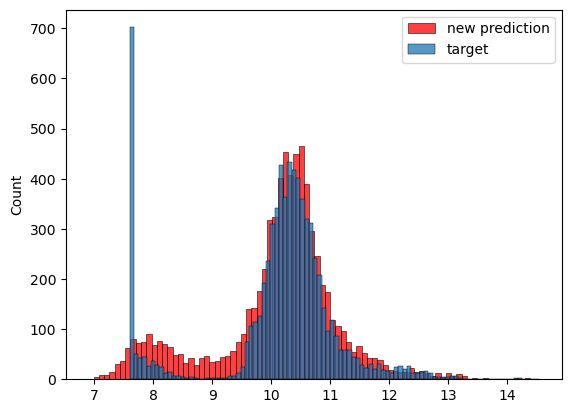

In [53]:
# сравним на диаграмме истинные и новые предсказанные значения

sns.histplot(y_pred_new, label='new prediction', color='r')
sns.histplot(y_train, label='target')
plt.legend()

Получилось явно лучше, но все еще "страдает" область с низкими ценами.

In [54]:
# рассчитаем RMSE для модели на основе новых характеристик

round(rmse(y_train, y_pred_new), 4)

0.3464

RMSE стал ниже (был - 0.5175).

## 7. Проверка новой модели

In [63]:
# матрица для проверки

X_val_new = df_val_new.values
X_val_new.shape

(2382, 275)

In [64]:
# построим прогноз цены на основе новых коэффициентов

y_val_new = a_0 + X_val_new.dot(a)

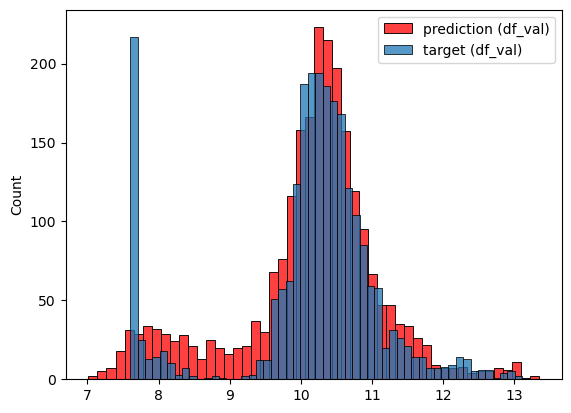

In [57]:
# сравним на диаграмме истинные и предсказанные значения для проверочного датафрейма
 
sns.histplot(y_val_new, label='prediction (df_val)', color='r')
sns.histplot(y_val, label='target (df_val)')
plt.legend()

In [58]:
round(rmse(y_val, y_val_new), 4)

0.3567

RMSE чуть больше, чем на тренировочном датафрейме.

In [59]:
# матрица для повторного тестирования

X_test_new = df_test_new.values
X_test_new.shape

(2384, 275)

In [60]:
# строим прогноз цены на основе новых коэффициентов

y_test_new = a_0 + X_test_new.dot(a)

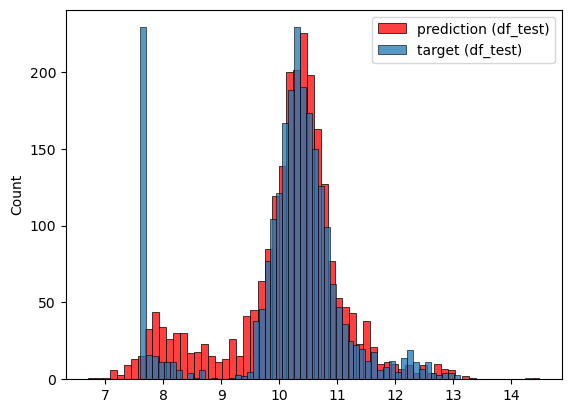

In [61]:
# сравнительная диаграмма
 
sns.histplot(y_test_new, label='prediction (df_test)', color='r')
sns.histplot(y_test, label='target (df_test)')
plt.legend()

In [62]:
round(rmse(y_test, y_test_new), 4)

0.3605

## 8. Использование sklearn.linear_model.LinearRegression

Сравним написанную вручную модель с моделью LinearRegression из пакета sklearn

In [65]:
# импорт

from sklearn.linear_model import LinearRegression

In [66]:
# подгонка модели. Сперва на базовых параметрах

reg = LinearRegression()
reg.fit(X_train_base, y_train)

LinearRegression()

In [67]:
# предсказание модели

y_train_LR = reg.predict(X_train_base)

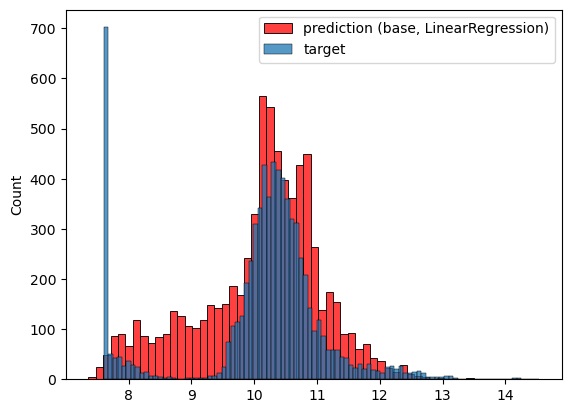

In [68]:
# сравнительная диаграмма
 
sns.histplot(y_train_LR, label='prediction (base, LinearRegression)', color='r')
sns.histplot(y_train, label='target')
plt.legend()

In [69]:
round(rmse(y_train, y_train_LR), 4)

0.5175

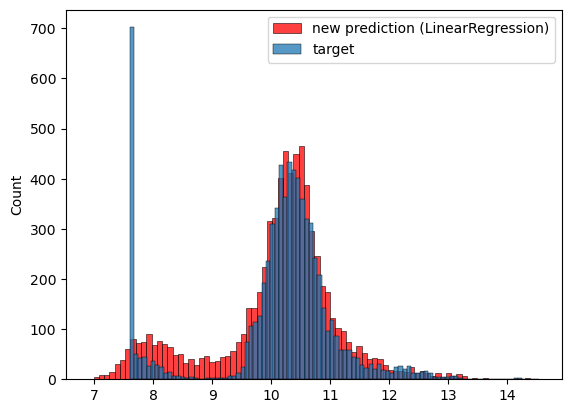

In [70]:
# теперь на расширенном наборе данный

reg.fit(X_train_new, y_train)

y_train_new_LR = reg.predict(X_train_new)

sns.histplot(y_train_new_LR, label='new prediction (LinearRegression)', color='r')
sns.histplot(y_train, label='target')
plt.legend()

In [71]:
round(rmse(y_train, y_train_new_LR), 4)

0.3464

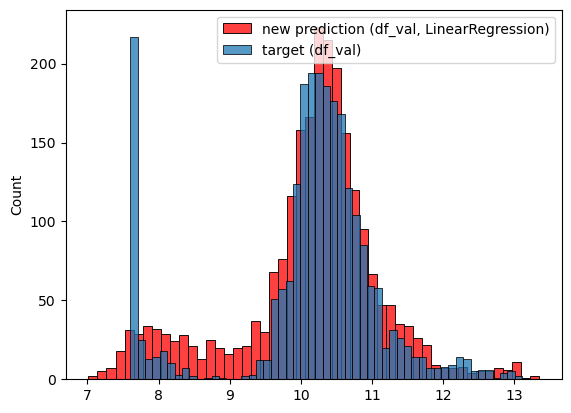

In [72]:
# подставляем в модель данные из проверочного набора

y_val_new_LR = reg.predict(X_val_new)

sns.histplot(y_val_new_LR, label='new prediction (df_val, LinearRegression)', color='r')
sns.histplot(y_val, label='target (df_val)')
plt.legend()

In [73]:
round(rmse(y_val, y_val_new_LR), 4)

0.3567

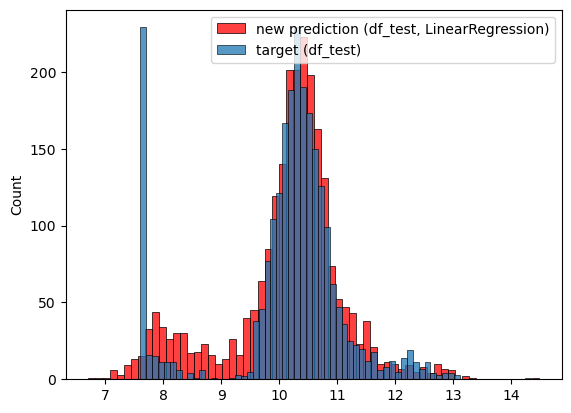

In [74]:
# подставляем в модель данные из тестового набора

y_test_new_LR = reg.predict(X_test_new)

sns.histplot(y_test_new_LR, label='new prediction (df_test, LinearRegression)', color='r')
sns.histplot(y_test, label='target (df_test)')
plt.legend()

In [75]:
round(rmse(y_test, y_test_new_LR), 4)

0.3605

## 9. Выводы

1. Построена модель линейной регрессии на основе NumPy для предсказания цены автомобилей на основе базовых числовых параметров.  Распределение предсказанных значений близко к фактическому, но с серьезными отклонениями. RMSE - 0.5175.
2. Категориальные признаки переведены в числовые. Построена новая модель линейной регрессии на основе NumPy для предсказания цены автомобилей с использованием базовых и новых параметров. Распределение предсказанных значений цен еще ближе к фактическому, отклонениям присутствуют только в области дешевых автомобилей. RMSE - 0.3464.
3. Проведена проверка новой модели на двух наборах данных. Предсказанное распределение цен все так же "страдает" в области дешевых автомобилей. RMSE - 0.3567 и 0.3605.
4. Отклонения в области дешевых автомобилей должны быть нивелированы после введения в регрессионную модель всех 914 моделей авто. Проверим это позже.
5. Проведено сравнение написанных вручную моделей с моделями на основе sklearn.linear_model.LinearRegression. Полученные диаграммы распределений и значения RMSE совпадают. 